# Data Visualization of Earthquakes¶

The data provided is the earthquake details from all the locations for one month

Importing required libraries for data manipulation and visualization

In [104]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

ReadingCSV file data and displaying the data

In [105]:
df = pd.read_csv('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-11-14T18:00:59.180Z,38.560800,-119.552300,9.40,0.90,ml,8.0,211.17,0.036000,0.0442,...,2021-11-14T18:04:21.734Z,"3 km W of Coleville, California",earthquake,NaN,0.90,0.230,3.0,automatic,nn,nn
1,2021-11-14T17:45:44.810Z,35.877333,-117.674333,3.15,0.63,ml,7.0,93.00,0.073050,0.0800,...,2021-11-14T17:49:24.471Z,"22km ESE of Little Lake, CA",earthquake,0.22,3.83,0.094,6.0,automatic,ci,ci
2,2021-11-14T17:35:49.950Z,17.954800,-67.100600,10.00,2.54,md,7.0,275.00,0.052400,0.0900,...,2021-11-14T17:50:10.400Z,"6 km WSW of La Parguera, Puerto Rico",earthquake,0.67,0.26,0.080,4.0,reviewed,pr,pr
3,2021-11-14T17:35:21.440Z,38.837002,-122.827667,1.80,0.86,md,10.0,84.00,0.006309,0.0200,...,2021-11-14T17:54:10.957Z,"9km NW of The Geysers, CA",earthquake,0.45,0.76,NaN,1.0,automatic,nc,nc
4,2021-11-14T17:30:24.100Z,36.042833,-117.856000,2.38,0.61,ml,8.0,137.00,0.044770,0.1000,...,2021-11-14T17:33:50.360Z,"8km E of Coso Junction, CA",earthquake,0.26,0.34,0.064,5.0,automatic,ci,ci


Descriptive analysis of data

In [106]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,8996.000000,8996.000000,8996.000000,8994.000000,6581.000000,7498.000000,6303.000000,8996.000000,6694.000000,8995.000000,7032.000000,7489.000000
mean,37.205737,-113.665340,21.982505,1.650155,20.500988,116.388973,0.560705,0.266607,1.573540,2.295825,0.317923,14.189478
std,19.278717,60.483749,53.677419,1.186673,15.336049,58.688693,1.919879,0.290297,2.923269,14.182166,0.581629,27.007448
min,-62.624300,-179.981800,-10.000000,-1.350000,0.000000,13.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000
25%,33.635375,-149.602550,2.800000,0.850000,9.000000,71.000000,0.017000,0.080000,0.280000,0.470000,0.111000,4.000000
50%,38.513917,-121.134833,7.840000,1.480000,16.000000,104.000000,0.055030,0.140000,0.480000,0.770000,0.174000,8.000000
75%,45.779458,-116.238458,17.380000,2.080000,27.000000,151.000000,0.161750,0.360000,0.920000,1.475000,0.264254,15.000000
max,86.307000,179.997700,655.670000,6.600000,126.000000,354.680000,40.492000,3.050000,39.420000,1244.000000,5.470000,610.000000


Column descrption of the dataframe:

time - Time at which earthquake occurred

latitude - Latitude value where the earthquake occurred Typical Values - [-90.0, 90.0]

longitude - Longitude value where the earthquake occurred Typical values - [-180.0, 180.0]

depth - The depth where the earthquake begins to rupture Typical values - [0, 1000]

mag - Earthquake magnitude is a measure of the size of an earthquake at its source. Typical Values - [-1.0, 10.0]

magType - The method or algorithm used to calculate the preferred magnitude for the event. Typical Values - “Md”, “Ml”, “Ms”, “Mw”, “Me”, “Mi”, “Mb”, “MLg” Reference - https://www.usgs.gov/natural-hazards/earthquake-hazards/science/magnitude-types

nst - The total number of seismic stations used to determine earthquake location.

gap - The largest azimuthal gap between azimuthally adjacent stations (in degrees). In general, the smaller this number, the more reliable is the calculated horizontal position of the earthquake. Typical values - [0.0, 180.0]

dmin - Horizontal distance from the epicenter to the nearest station (in degrees). 1 degree is approximately 111.2 kilometers. In general, the smaller this number, the more reliable is the calculated depth of the earthquake. Typical values - [0.4, 7.1]

rms - The root-mean-square (RMS) travel time residual, in sec, using all weights. This parameter provides a measure of the fit of the observed arrival times to the predicted arrival times for this location. Typical values - [0.13,1.39]

net - The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event. Typical values - ak, at, ci, hv, ld, mb, nc, nm, nn, pr, pt, se, us, uu, uw

id - A unique identifier for the event.

updated - Time when the event was most recently updated. Times are reported in milliseconds since the epoch. In certain output formats, the date is formatted for readability.

place - Textual description of named geographic region near to the event.

type - Type of seismic event. Typical values - “earthquake”, “quarry”,"chemical explosion", "mining explosion", ice quake","explosion"

horizontalError - Uncertainty of reported location of the event in kilometers. Typical values - [0, 100]

depthError - Uncertainty of reported depth of the event in kilometers. Typical values - [0, 100]

magError - Uncertainty of reported magnitude of the event. The estimated standard error of the magnitude Typical values - [0, 100]

magNst - The total number of seismic stations used to calculate the magnitude for this earthquake. Typical values - “Md”, “Ml”, “Ms”, “Mw”, “Me”, “Mi”, “Mb”, “MLg” Reference - https://www.usgs.gov/natural-hazards/earthquake-hazards/science/magnitude-types?qt-science_center_objects=0#qt-science_center_objects

Status - Indicates whether the event has been reviewed by a human. Typical values - “automatic”, “reviewed”, “deleted”

locationSource - The network that originally authored the reported location of this event.

magSource - Network that originally authored the reported magnitude for this event. Typical Values - ak, at, ci, hv, ld, mb, nc, nm, nn, pr, pt, se, us, uu, uw






Rows and Column details of the data:

In [107]:
df.shape

(8996, 22)

Checking the null values of the data:

In [108]:
df.isnull()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
8993,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
8994,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The data has null values hence replacing the null values with 0's and checking the data again for null values

In [5]:
df.fillna(0,inplace=True)

In [6]:
df.isnull()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9052,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9053,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9054,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9055,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Hypothesis: Which areas has the most earthquakes occured?

Identifying the earthquake locations on the world map using the .latitude and longitude values:
Using 'place' column as hover_name, hence when we click on the dot of plot, the place name can be derived from the dataframe

In [109]:
fig = px.scatter_geo(df,lat='latitude',lon='longitude',hover_name='place')
fig.update_layout(title = 'Earthquakes location on world map', title_x=0.5)
fig.show()

Observation:
From the above map, we can identify that most of the earthquakes occured in the region of Alaska,Orgeon, Nevada, Utah,Indonesia,Phillippines, Russia and Japan region

# Hypothesis: Which explosion type is deteced more?

<AxesSubplot:title={'center':'Pie chart representation of different types of Seismic Events'}, ylabel='id'>

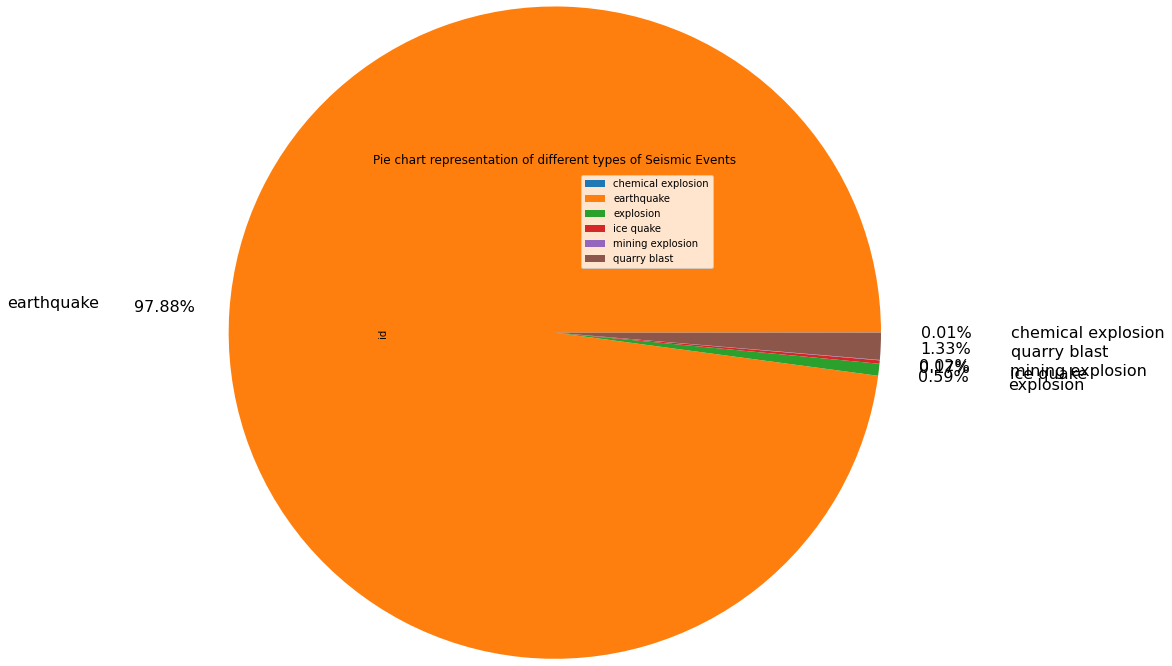

In [140]:
df.groupby(['type']).count().plot(kind='pie',y= 'id',radius = 2.5,title=
 "Pie chart representation of different types of Seismic Events",autopct='%1.2f%%',fontsize=16,figsize=(6, 6),pctdistance=1.2,labeldistance=1.4)

Observation:
From the above pie chart we could infer that, the magnitude recording detected percentages
Earthquakes - 97.88%
Chemical explosion - 0.01%
QUarry blast - 1.33%
mining explosion - 0.17%
ice explosion - 0.02%
explosion - 0.59%

# Hypothesis: Which type of explosion has the highest magnitude: 

<AxesSubplot:title={'center':'Type of Explosion Vs Magnitude'}, xlabel='type', ylabel='Magnitude'>

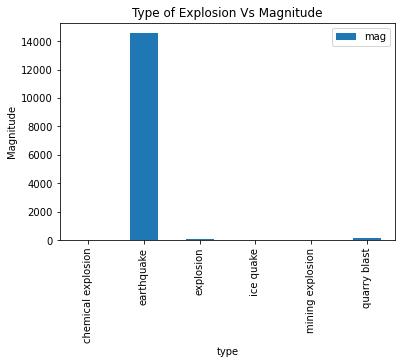

In [142]:
df.groupby('type').sum().plot(y=['mag'],kind="bar",ylabel='Magnitude',title='Type of Explosion Vs Magnitude')

Observation: Earthquakes had the highest magnitude when compared to others.

# Identifying which explosion type has the highest magnitude error

[Text(0.5, 1.0, 'Explosion type Vs Magnitude Error')]

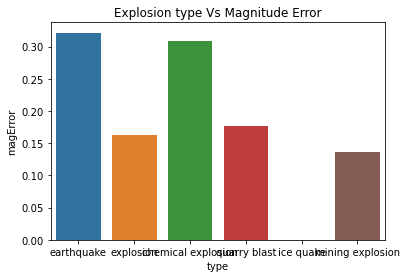

In [148]:
sns.barplot(data=df,x='type',y='magError',ci=None).set(title='Explosion type Vs Magnitude Error')

Observation: Earthquakes has the highest magnitude error recorded while explosions

# Analysing how the magnitude recorded with the magnitude type: 
Magnitude type is the method or algorithm used to calculate the preferred magnitude for the event.

[Text(0.5, 1.0, 'Magnitude value calculated by magnitude type')]

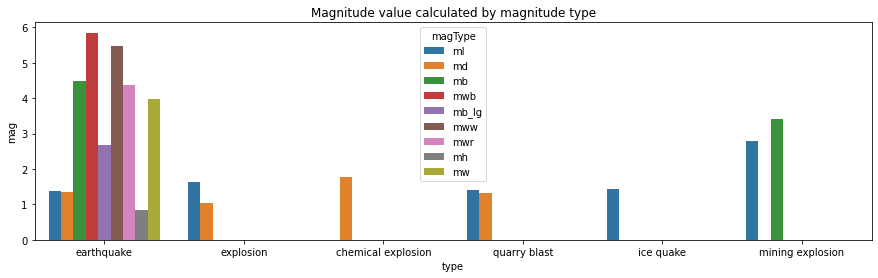

In [147]:
plt.figure(figsize=(15,4))
sns.barplot(data=df,x='type',y='mag',ci=None,hue = 'magType').set(title='Magnitude value calculated by magnitude type')

Observation:
Only earthquake explosion has all kind of magnitude type recordings of magnitude.

# Hypothesis: Which magnitude type has the highest count for each explosion type

<AxesSubplot:xlabel='type', ylabel='count'>

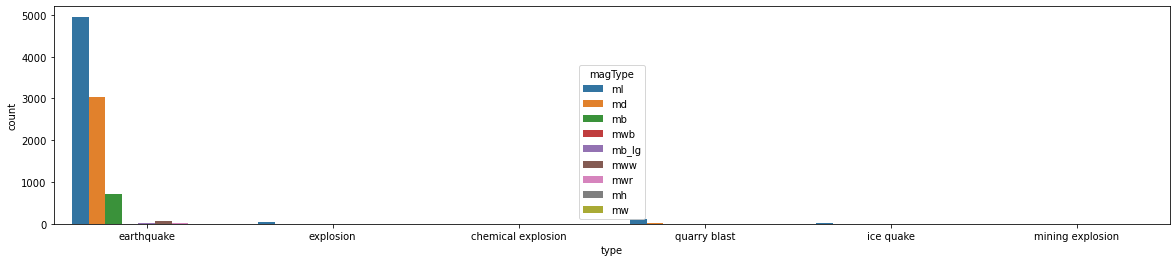

In [149]:
plt.figure(figsize=(20,4))
sns.countplot(data=df,x='type',hue = 'magType')

Observation:
ml Magnitude type has the highest count for earthquake and remaining explosions.

# Analysing which magnitude type has the highest magnitude recorded 

Text(0.5, 1.0, 'Box plot comparison for magnitude based on measure of magnitude type')

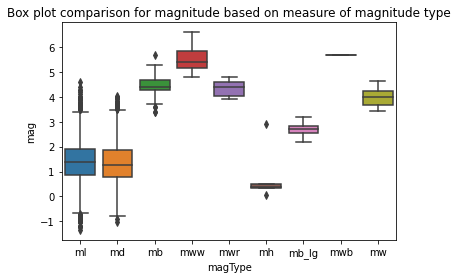

In [49]:
sns.boxplot(data=df,x='magType',y='mag')
plt.title("Box plot comparison for magnitude based on measure of magnitude type")

Observation:
mww has recorded the highest magnitude value

# Hypothesis: Comparison of the magnitude value and magnitude error for each magnitude type

<AxesSubplot:title={'center':'Total magnitude recorded by a particularmagnitude type'}, xlabel='magType', ylabel='Magnitude'>

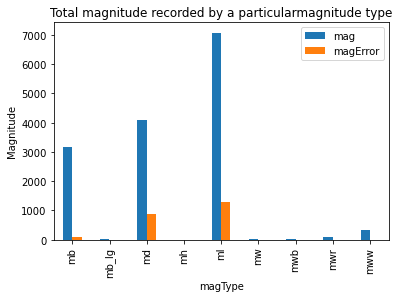

In [150]:
df.groupby('magType').sum().plot(y=['mag','magError'],kind="bar",ylabel='Magnitude',title='Total magnitude recorded by a particularmagnitude type')

Observation:
ml has the highest magnitude value and the magnitude error values, it could be observed that magnitude error has correlation with the magnitude value. For higher magnitude values, higher magnitude error is recorded

# Hypothesis: magnitude and magnitude value based on the location source

<AxesSubplot:title={'center':'Magnitude and Magnitude error values from different location sources'}, xlabel='locationSource', ylabel='magnitude'>

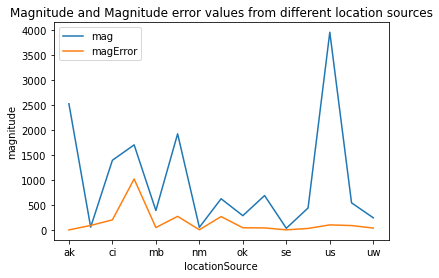

In [152]:
df.groupby('locationSource').sum().plot(y=['mag','magError'],kind="line",ylabel='magnitude',title='Magnitude and Magnitude error values from different location sources')

Observation:
us location has the highest magnitude value and lowest magnitude error value recorded compared to others

# Hypothesis depth and depth error using heat map

Text(0.5, 1.0, 'Correlation Heatmap')

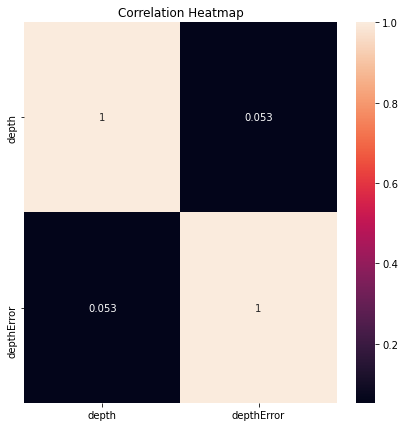

In [153]:
fig, ax = plt.subplots(figsize=(7, 7))
heatmap = sns.heatmap(df[['magType', 'depth', 'depthError']].corr(), vmax=1, annot=True,ax = ax)
heatmap.set_title('Correlation Heatmap')

Observation:
It could be observed that there is correlation between the depth and deptherror

Validating the above scenario with the bar plot

<AxesSubplot:xlabel='magType'>

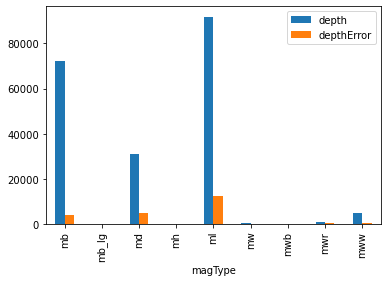

In [81]:
df.groupby('magType').sum().plot(y=['depth','depthError'],kind="bar")

Observation:
1. It is validated that there is correlation between the depth and depth error

# Analysis of the rms value with the location source

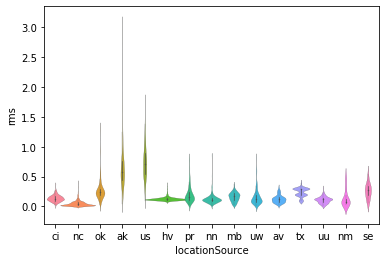

In [98]:
ax = sns.violinplot(y="rms",x='locationSource',linewidth=0.2,data=df,saturation=75,width=2,gridsize=1000)

Observation:
It is observed that Location source 'ak' has the highest rms value.

# Hypotheses: Which location source has the lowest and highest dmin value

dmin - Horizontal distance from the epicenter to the nearest station (in degrees). 
Smaller the value of dmin, more reliable is the calculated depth of the earthquake.
Plotting scatter plot to analyse the dmin values from each location Source

<AxesSubplot:xlabel='locationSource', ylabel='dmin'>

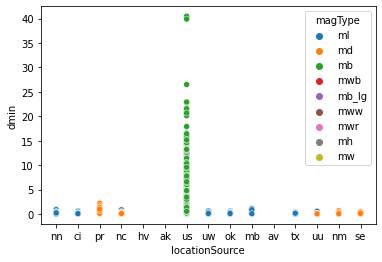

In [157]:
sns.scatterplot(data=df,x='locationSource',y='dmin',ci=None,hue='magType')

Observation:
1. ak,hv,av location sources has 0 dmin values and us has the highest dmin value
2. The location source of us has the magnitude type of mb